In [1]:
! pip install chembl_webresource_client

  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jsonschema 4.20.0 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.31.1 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [2]:
! pip install pandas

In [3]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [4]:
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
4,[],Human coronavirus 229E,Human coronavirus 229E,12.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,12.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [5]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL3927'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


In [7]:
df.to_csv('coronavirus_bioactivity_data.csv', index=False)

In [8]:
# ! head coronavirus_bioactivity_data.csv

In [9]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


In [10]:
bioactivity_class = []
for i in df2.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append('inactive')
    elif float(i) <= 1000:
        bioactivity_class.append('active')
    else:
        bioactivity_class.append('intermediate')

In [11]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2[selection]
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)

In [12]:
df4.to_csv('coronavirus_bioactivity_preprocessed_data.csv', index=False)

In [13]:
df = pd.read_csv('coronavirus_bioactivity_preprocessed_data.csv')

In [14]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [15]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [16]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


In [17]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive


In [18]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [19]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.29102,0.0,3.0


In [20]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [21]:
df_combined.standard_value.describe()

count        133.000000
mean       85967.130075
std       158897.319181
min           50.000000
25%        10100.000000
50%        17500.000000
75%        70000.000000
max      1000000.000000
Name: standard_value, dtype: float64

In [22]:
-np.log10( (10**-9)* 100000000 )

1.0

In [23]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [24]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [25]:
df_norm = norm_value(df_combined)
df_norm

/var/folders/6f/ng8slxhj06ndtltysyms_zbh0000gn/T/ipykernel_47489/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,10700.0


In [26]:
df_norm.standard_value_norm.describe()

count        133.000000
mean       85967.130075
std       158897.319181
min           50.000000
25%        10100.000000
50%        17500.000000
75%        70000.000000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [27]:
df_final = pIC50(df_norm)
df_final

/var/folders/6f/ng8slxhj06ndtltysyms_zbh0000gn/T/ipykernel_47489/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [28]:
df_final.pIC50.describe()

count    133.000000
mean       4.718269
std        0.920910
min        3.000000
25%        4.154902
50%        4.756962
75%        4.995679
max        7.301030
Name: pIC50, dtype: float64

In [29]:
# remove intermediate class

df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [30]:
# re-save preprocessed data with new catenated columns

df5 = df_2class.to_csv('coronavirus_bioactivity_preprocessed_data.csv', index=False)

In [31]:
# exploratory data analysis (chemical space analysis) via Lipinski descriptors

In [32]:
conda install seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [33]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

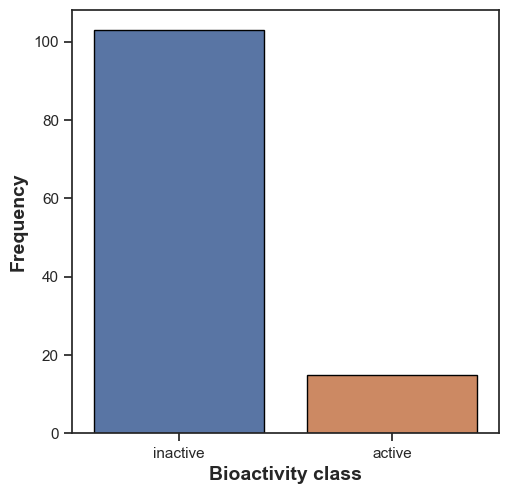

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

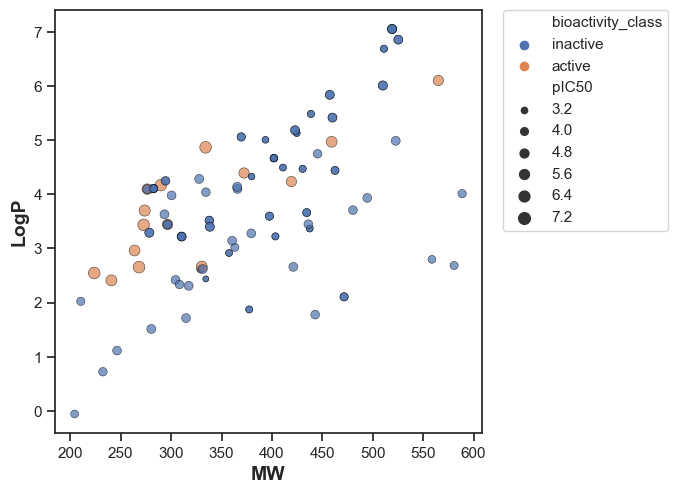

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

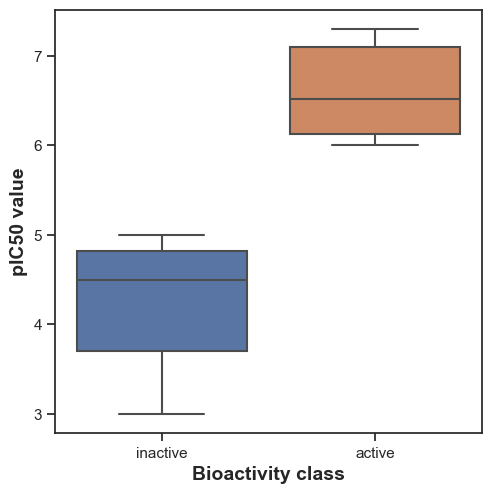

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [37]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [38]:
conda install scipy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [39]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1545.0,4.428384e-10,0.05,Different distribution (reject H0)


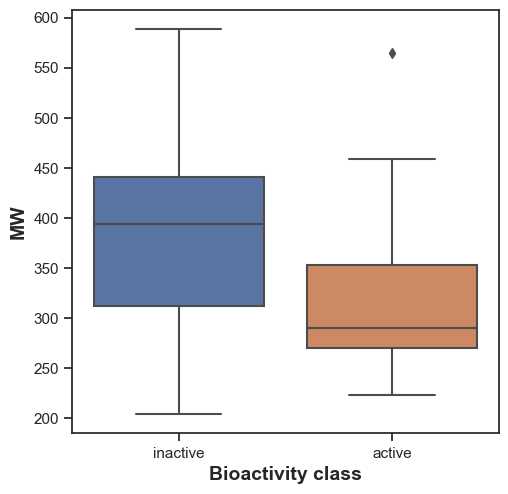

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [41]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,408.5,0.003313,0.05,Different distribution (reject H0)


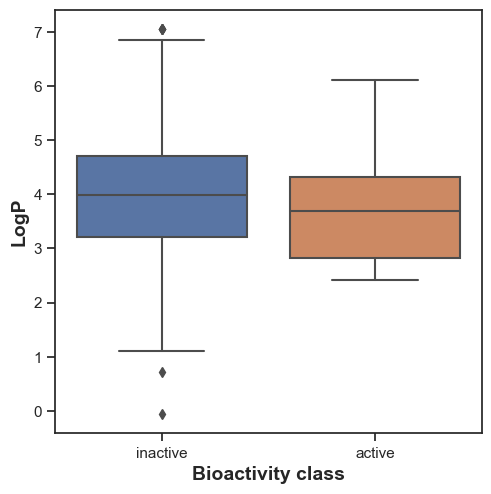

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [43]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,712.5,0.630683,0.05,Same distribution (fail to reject H0)


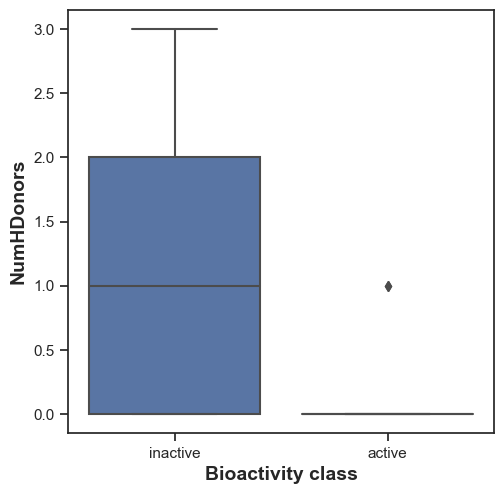

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [45]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,298.5,0.000053,0.05,Different distribution (reject H0)


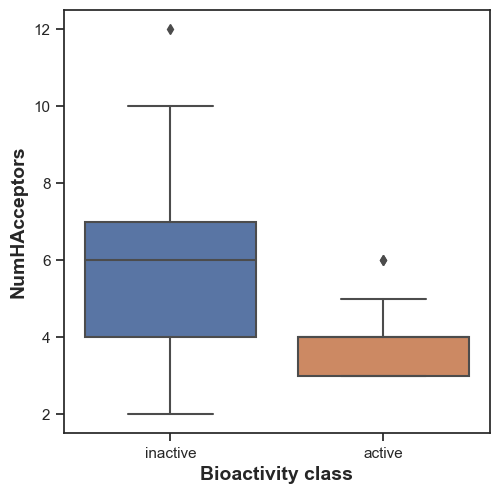

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [47]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,414.0,0.003402,0.05,Different distribution (reject H0)


In [48]:
print("Given the pIC50 values for active and inactive compounds varied significantly in magnitude (pIC50 > 6 = Actives and pIC50 < 5 = Inactives), their box plot distributions were statistically different in terms of the Mann Whitney test.")

Given the pIC50 values for active and inactive compounds varied significantly in magnitude (pIC50 > 6 = Actives and pIC50 < 5 = Inactives), their box plot distributions were statistically different in terms of the Mann Whitney test.


In [49]:
print("All of Lipinski's descriptors (MW, LogP, NumHDonors, NumHAcceptors) displayed no significant statistical difference except for LogP")

All of Lipinski's descriptors (MW, LogP, NumHDonors, NumHAcceptors) displayed no significant statistical difference except for LogP


In [50]:
# zip files

! zip -r results.zip . -i *.csv *.pdf

updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: bioactivity_data.csv (deflated 90%)
updating: mannwhitneyu_NumHDonors.csv (deflated 9%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: plot_LogP.pdf (deflated 37%)
updating: bioactivity_preprocessed_data.csv (deflated 77%)
updating: plot_MW.pdf (deflated 38%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: plot_NumHAcceptors.pdf (deflated 37%)
updating: plot_ic50.pdf (deflated 37%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: plot_MW_vs_LogP.pdf (deflated 15%)
updating: mannwhitneyu_LogP.csv (deflated 8%)
updating: descriptors_output.csv (deflated 95%)
updating: coronavirus_bioactivity_data.csv (deflated 90%)
updating: bioactivity_processed_data_pIC50_pubchem_fp.csv (deflated 94%)
updating: coronavirus_bioactivity_preprocessed_data.csv (deflated 77%)
updating: coronavirus_bioactivity_processed_data_pIC50_pubchem_fp.csv (deflated 94%)


In [51]:
# download PaDEL-Descriptor

! curl -0 https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! curl -0 https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [52]:
# redownload if files are too small to unzip/retrieve data from

! curl -L -o padel.zip https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! curl -L -o padel.sh https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 24.5M  100 24.5M    0     0  12.9M      0  0:00:01  0:00:01 --:--:-- 28.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   231  100   231    0     0    192      0  0:00:01  0:00:01 --:--:--   728


In [53]:
! ls -lh padel.zip

-rw-r--r--  1 thomasstack  staff    25M Dec  5 19:38 padel.zip


In [54]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [55]:
df5 = pd.read_csv('coronavirus_bioactivity_preprocessed_data.csv')
df5

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
1,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
2,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
3,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
4,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
113,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
114,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
115,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
116,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [56]:
selection = ['canonical_smiles','molecule_chembl_id']
df5_selection = df5[selection]
df5_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [57]:
# read the first 5 lines of data

! cat molecule.smi | head -5

O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21	CHEMBL185698
O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21	CHEMBL426082
O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21	CHEMBL365134
O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21	CHEMBL190743
O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21	CHEMBL365469


In [58]:
# verify how many lines of molecules we have

! cat molecule.smi | wc -l

     118


In [59]:
# calculate fingerprint descriptors

! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [60]:
! bash padel.sh

Processing CHEMBL370923 in molecule.smi (8/118). 
Processing CHEMBL426082 in molecule.smi (2/118). 
Processing CHEMBL185698 in molecule.smi (1/118). 
Processing CHEMBL365134 in molecule.smi (3/118). 
Processing CHEMBL188983 in molecule.smi (6/118). 
Processing CHEMBL365469 in molecule.smi (5/118). 
Processing CHEMBL191575 in molecule.smi (7/118). 
Processing CHEMBL190743 in molecule.smi (4/118). 
Processing CHEMBL194398 in molecule.smi (9/118). Average speed: 4.54 s/mol.
Processing CHEMBL196635 in molecule.smi (10/118). Average speed: 2.31 s/mol.
Processing CHEMBL209287 in molecule.smi (11/118). Average speed: 2.33 s/mol.
Processing CHEMBL358279 in molecule.smi (12/118). Average speed: 1.56 s/mol.
Processing CHEMBL348660 in molecule.smi (13/118). Average speed: 1.56 s/mol.
Processing CHEMBL210525 in molecule.smi (15/118). Average speed: 0.67 s/mol.
Processing CHEMBL379727 in molecule.smi (14/118). Average speed: 0.94 s/mol.
Processing CHEMBL148483 in molecule.smi (16/118). Average spee

In [61]:
# look for descriptors_output

! ls -l

total 54288
-rw-r--r--   1 thomasstack  staff    304852 Dec  5 19:41 CoronaProject.ipynb
drwxrwxr-x  21 thomasstack  staff       672 May 30  2020 PaDEL-Descriptor
drwxr-xr-x   4 thomasstack  staff       128 Dec  5 13:09 __MACOSX
-rw-r--r--   1 thomasstack  staff     68403 Dec  4 18:20 bioactivity_data.csv
-rw-r--r--   1 thomasstack  staff     15221 Dec  5 13:15 bioactivity_preprocessed_data.csv
-rw-r--r--   1 thomasstack  staff    221311 Dec  5 13:39 bioactivity_processed_data_pIC50_pubchem_fp.csv
-rw-r--r--   1 thomasstack  staff     68403 Dec  5 19:37 coronavirus_bioactivity_data.csv
-rw-r--r--   1 thomasstack  staff     15221 Dec  5 19:37 coronavirus_bioactivity_preprocessed_data.csv
-rw-r--r--   1 thomasstack  staff    221311 Dec  5 16:11 coronavirus_bioactivity_processed_data_pIC50_pubchem_fp.csv
-rw-r--r--   1 thomasstack  staff    221032 Dec  5 19:41 descriptors_output.csv
-rw-r--r--   1 thomasstack  staff       121 Dec  5 19:38 mannwhitneyu_LogP.csv
-rw-r--r--   1 thomasstack  

In [62]:
# prepare the X and Y data matrices

df5_X = pd.read_csv('descriptors_output.csv')
df5_X = df5_X.drop(columns=['Name'])
df5_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
114,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
115,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
116,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# retrieve pIC50 values

df5_Y = df5['pIC50']
df5_Y

0      4.869666
1      4.882397
2      6.008774
3      6.022276
4      4.950782
         ...   
113    4.974694
114    4.995679
115    4.939302
116    4.970616
117    4.102923
Name: pIC50, Length: 118, dtype: float64

In [64]:
# add Y column to the end of the X matrix

dataset = pd.concat([df5_X,df5_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.008774
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.022276
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.950782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.974694
114,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.995679
115,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.939302
116,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.970616


In [65]:
# save dataset to csv before model building

dataset.to_csv('coronavirus_bioactivity_processed_data_pIC50_pubchem_fp.csv', index=False)

In [66]:
!pip install scikit-learn

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [68]:
df6 = pd.read_csv('coronavirus_bioactivity_processed_data_pIC50_pubchem_fp.csv')

In [69]:
X = df6.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
114,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
115,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
116,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
Y = df6.pIC50
Y

0      4.869666
1      4.882397
2      6.008774
3      6.022276
4      4.950782
         ...   
113    4.974694
114    4.995679
115    4.939302
116    4.970616
117    4.102923
Name: pIC50, Length: 118, dtype: float64

In [71]:
X.shape, Y.shape

((118, 881), (118,))

In [72]:
# remove low variance features

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(118, 197)

In [73]:
# split the data in training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((94, 197), (94,), (24, 197), (24,))

In [74]:
# build a regression model using random forest algorithm

np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6361642140251555

In [75]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

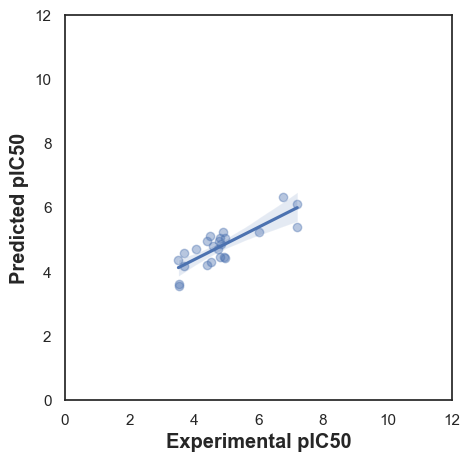

In [76]:
# plot experimental vs predicted pIC50 values against each other

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [77]:
# comparing several ML algorithms using lazypredict library

In [78]:
! pip install lazypredict

In [79]:
import lazypredict

In [103]:
# from lazypredict.Supervised import LazyRegressor
# if your Mac won't read the file correctly, pull from file in your Finder
from tqdm import tqdm
import datetime
import time
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin
from sklearn.base import ClassifierMixin
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
    f1_score,
    r2_score,
    mean_squared_error,
)
import warnings
import xgboost

# import catboost
# import lightgbm

warnings.filterwarnings("ignore")
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

removed_classifiers = [
    "ClassifierChain",
    "ComplementNB",
    "GradientBoostingClassifier",
    "GaussianProcessClassifier",
    "HistGradientBoostingClassifier",
    "MLPClassifier",
    "LogisticRegressionCV", 
    "MultiOutputClassifier", 
    "MultinomialNB", 
    "OneVsOneClassifier",
    "OneVsRestClassifier",
    "OutputCodeClassifier",
    "RadiusNeighborsClassifier",
    "VotingClassifier",
]

removed_regressors = [
    "TheilSenRegressor",
    "ARDRegression", 
    "CCA", 
    "IsotonicRegression", 
    "StackingRegressor",
    "MultiOutputRegressor", 
    "MultiTaskElasticNet", 
    "MultiTaskElasticNetCV", 
    "MultiTaskLasso", 
    "MultiTaskLassoCV", 
    "PLSCanonical", 
    "PLSRegression", 
    "RadiusNeighborsRegressor", 
    "RegressorChain", 
    "VotingRegressor", 
]

CLASSIFIERS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], ClassifierMixin) and (est[0] not in removed_classifiers))
]

REGRESSORS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] not in removed_regressors))
]

# REGRESSORS.append(("XGBRegressor", xgboost.XGBRegressor))
# REGRESSORS.append(("LGBMRegressor", lightgbm.LGBMRegressor))
# REGRESSORS.append(('CatBoostRegressor',catboost.CatBoostRegressor))

# CLASSIFIERS.append(("XGBClassifier", xgboost.XGBClassifier))
# CLASSIFIERS.append(("LGBMClassifier", lightgbm.LGBMClassifier))
# CLASSIFIERS.append(('CatBoostClassifier',catboost.CatBoostClassifier))

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_transformer_low = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("encoding", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

categorical_transformer_high = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        # 'OrdianlEncoder' Raise a ValueError when encounters an unknown value. Check https://github.com/scikit-learn/scikit-learn/pull/13423
        ("encoding", OrdinalEncoder()),
    ]
)

def get_card_split(df, cols, n=11):
    """
    Splits categorical columns into 2 lists based on cardinality (i.e # of unique values)
    Parameters
    ----------
    df : Pandas DataFrame
        DataFrame from which the cardinality of the columns is calculated.
    cols : list-like
        Categorical columns to list
    n : int, optional (default=11)
        The value of 'n' will be used to split columns.
    Returns
    -------
    card_low : list-like
        Columns with cardinality < n
    card_high : list-like
        Columns with cardinality >= n
    """
    cond = df[cols].nunique() > n
    card_high = cols[cond]
    card_low = cols[~cond]
    return card_low, card_high

def adjusted_rsquared(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    
class LazyRegressor:

    def __init__(
        self,
        verbose=0,
        ignore_warnings=True,
        custom_metric=None,
        predictions=False,
        random_state=42,
        regressors="all",
    ):
        self.verbose = verbose
        self.ignore_warnings = ignore_warnings
        self.custom_metric = custom_metric
        self.predictions = predictions
        self.models = {}
        self.random_state = random_state
        self.regressors = regressors

    def fit(self, X_train, X_test, y_train, y_test):
        R2 = []
        ADJR2 = []
        RMSE = []
        # WIN = []
        names = []
        TIME = []
        predictions = {}

        if self.custom_metric:
            CUSTOM_METRIC = []

        if isinstance(X_train, np.ndarray):
            X_train = pd.DataFrame(X_train)
            X_test = pd.DataFrame(X_test)

        numeric_features = X_train.select_dtypes(include=[np.number]).columns
        categorical_features = X_train.select_dtypes(include=["object"]).columns

        categorical_low, categorical_high = get_card_split(
            X_train, categorical_features
        )

        preprocessor = ColumnTransformer(
            transformers=[
                ("numeric", numeric_transformer, numeric_features),
                ("categorical_low", categorical_transformer_low, categorical_low),
                ("categorical_high", categorical_transformer_high, categorical_high),
            ]
        )

        if self.regressors == "all":
            self.regressors = REGRESSORS
        else:
            try:
                temp_list = []
                for regressor in self.regressors:
                    full_name = (regressor.__name__, regressor)
                    temp_list.append(full_name)
                self.regressors = temp_list
            except Exception as exception:
                print(exception)
                print("Invalid Regressor(s)")

        for name, model in tqdm(self.regressors):
            start = time.time()
            try:
                if "random_state" in model().get_params().keys():
                    pipe = Pipeline(
                        steps=[
                            ("preprocessor", preprocessor),
                            ("regressor", model(random_state=self.random_state)),
                        ]
                    )
                else:
                    pipe = Pipeline(
                        steps=[("preprocessor", preprocessor), ("regressor", model())]
                    )

                pipe.fit(X_train, y_train)
                self.models[name] = pipe
                y_pred = pipe.predict(X_test)

                r_squared = r2_score(y_test, y_pred)
                # adj_rsquared = adjusted_rsquared(
                #     r_squared, X_test.shape[0], X_test.shape[1]
                # )
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))

                names.append(name)
                R2.append(r_squared)
                # ADJR2.append(adj_rsquared)
                RMSE.append(rmse)
                TIME.append(time.time() - start)

                if self.custom_metric:
                    custom_metric = self.custom_metric(y_test, y_pred)
                    CUSTOM_METRIC.append(custom_metric)

                if self.verbose > 0:
                    scores_verbose = {
                        "Model": name,
                        "R-Squared": r_squared,
                        # "Adjusted R-Squared": adj_rsquared,
                        "RMSE": rmse,
                        "Time taken": time.time() - start,
                    }

                    if self.custom_metric:
                        scores_verbose[self.custom_metric.__name__] = custom_metric

                    print(scores_verbose)
                if self.predictions:
                    predictions[name] = y_pred
            except Exception as exception:
                if self.ignore_warnings is False:
                    print(name + " model failed to execute")
                    print(exception)

        scores = {
            "Model": names,
            # "Adjusted R-Squared": ADJR2,
            "R-Squared": R2,
            "RMSE": RMSE,
            "Time Taken": TIME,
        }

        if self.custom_metric:
            scores[self.custom_metric.__name__] = CUSTOM_METRIC

        scores = pd.DataFrame(scores)
        scores = scores.sort_values(by="R-Squared", ascending=False).set_index(
            "Model"
        )

        if self.predictions:
            predictions_df = pd.DataFrame.from_dict(predictions)
        return scores, predictions_df if self.predictions is True else scores

    def provide_models(self, X_train, X_test, y_train, y_test):
        if len(self.models.keys()) == 0:
            self.fit(X_train, X_test, y_train, y_test)

        return self.models

In [82]:
df7 = pd.read_csv('coronavirus_bioactivity_processed_data_pIC50_pubchem_fp.csv')

In [85]:
X = df7.drop('pIC50', axis=1)
Y = df7.pIC50

In [87]:
# verify shape again

X.shape

(118, 881)

In [110]:
# remove low variance features (if you have a large enough dataset)

# from sklearn.feature_selection import VarianceThreshold
# selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
# X = selection.fit_transform(X)
# X.shape

In [106]:
# split data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [107]:
# build the lazyregressor

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test, predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████████████████████████████████████████████████| 40/40 [00:09<00:00,  4.37it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.50it/s]


In [108]:
predictions_train

,R-Squared,RMSE,Time Taken
Model,,,
ExtraTreeRegressor,0.82,0.34,0.01
DecisionTreeRegressor,0.82,0.34,0.01
ExtraTreesRegressor,0.82,0.34,0.15
GaussianProcessRegressor,0.82,0.34,0.01
LinearRegression,0.81,0.34,0.01
TransformedTargetRegressor,0.81,0.34,0.01
GradientBoostingRegressor,0.81,0.34,0.07
MLPRegressor,0.80,0.35,0.09
Ridge,0.77,0.38,0.01


In [111]:
predictions_test

,R-Squared,RMSE,Time Taken
Model,,,
SGDRegressor,0.43,0.97,0.01
PoissonRegressor,0.42,0.98,0.02
RidgeCV,0.42,0.98,0.01
AdaBoostRegressor,0.41,0.98,0.06
TweedieRegressor,0.40,0.99,0.02
GammaRegressor,0.40,1.00,0.02
HistGradientBoostingRegressor,0.39,1.00,0.17
KNeighborsRegressor,0.38,1.01,0.01
LassoLarsCV,0.38,1.01,0.03


[(0.0, 1.0)]

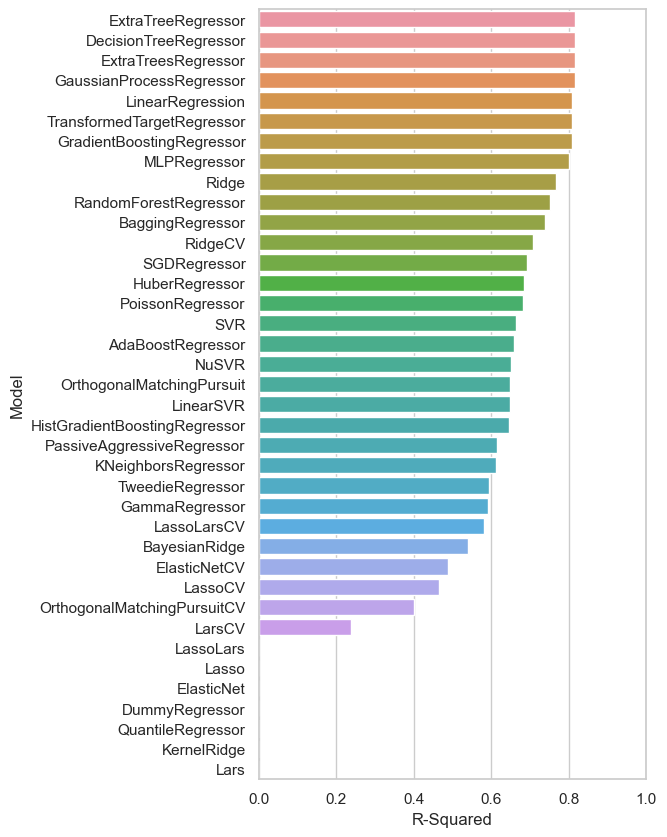

In [113]:
# visualizing the model performance with a bar plot of R-squared values

# train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

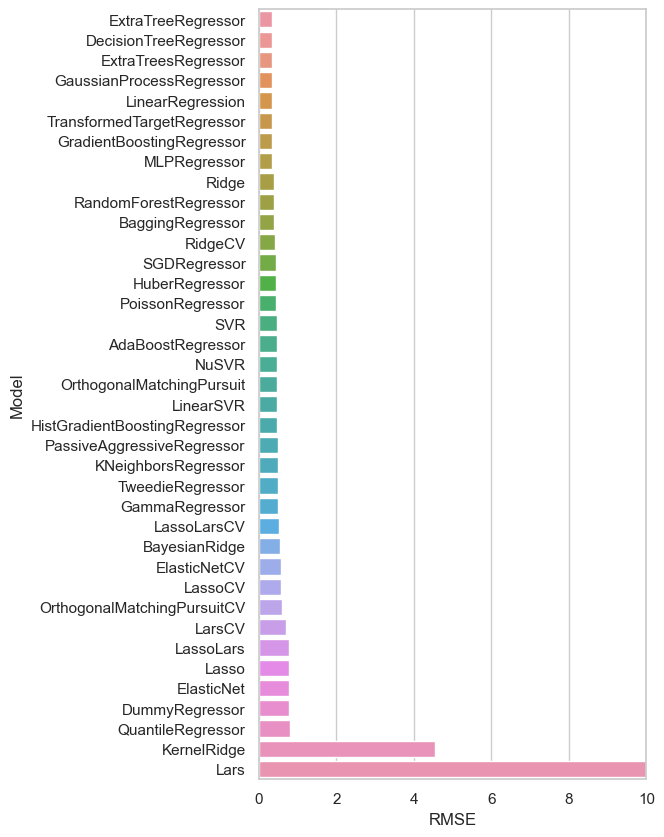

In [114]:
# visualizing the model performance with a bar plot of RMSE values

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 5.0)]

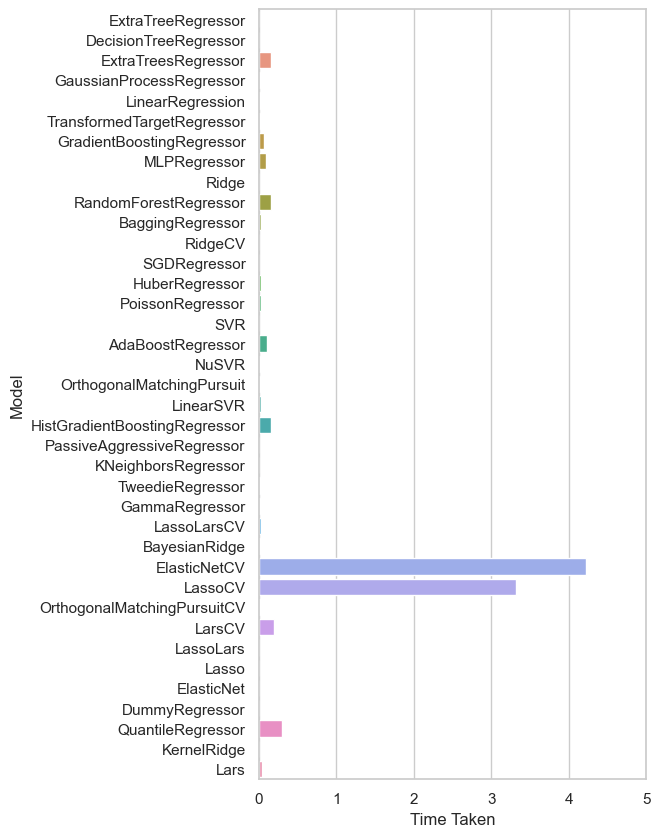

In [118]:
# visualizing the model performance with a bar plot of time taken

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 5))